# Store Sales – Time Series Forecasting

# About Dataset:
This project uses the Store Sales – Time Series Forecasting dataset, which focuses on predicting daily grocery sales for retail stores operated by Corporación Favorita, a large supermarket chain in Ecuador.

The dataset contains historical transactional data for thousands of product families sold across multiple stores. It captures real-world retail dynamics such as promotions, holidays, store characteristics, and external economic factors, making it highly suitable for time series forecasting.

The primary goal is to forecast future sales amounts based on past patterns and external influences.


# Objective of the Dataset

- Predict future daily sales for grocery products

- Analyze trend, seasonality, and demand patterns

- Evaluate the impact of promotions and holidays

- Compare classical and modern time series models such as:

    - ARIMA

    - SARIMAX

    - Prophet

# Data collection:
The data has been referred fron :https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error

from scipy.stats import zscore
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

Data Collection and Exploration

In [2]:
df=pd.read_csv("data/train.csv")
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df.tail()

In [4]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [5]:
df.shape

(3000888, 6)

In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
df.describe()


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [8]:
# Drop unnecessary columns
df = df.drop(['id'], axis=1)

In [9]:
df.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [10]:
df['store_family'] = df['store_nbr'].astype(str) + '_' + df['family']
df.head()

,date,store_nbr,family,sales,onpromotion,store_family
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1_AUTOMOTIVE
1,2013-01-01,1,BABY CARE,0.0,0,1_BABY CARE
2,2013-01-01,1,BEAUTY,0.0,0,1_BEAUTY
3,2013-01-01,1,BEVERAGES,0.0,0,1_BEVERAGES
4,2013-01-01,1,BOOKS,0.0,0,1_BOOKS


In [11]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Then set it as index
df.set_index('date', inplace=True)

# Check
df.head()



,store_nbr,family,sales,onpromotion,store_family
date,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,1_AUTOMOTIVE
2013-01-01,1,BABY CARE,0.0,0,1_BABY CARE
2013-01-01,1,BEAUTY,0.0,0,1_BEAUTY
2013-01-01,1,BEVERAGES,0.0,0,1_BEVERAGES
2013-01-01,1,BOOKS,0.0,0,1_BOOKS


In [12]:
df = df.drop(['store_nbr', 'family'], axis=1)

In [13]:
df.head()

,sales,onpromotion,store_family
date,,,
2013-01-01,0.0,0,1_AUTOMOTIVE
2013-01-01,0.0,0,1_BABY CARE
2013-01-01,0.0,0,1_BEAUTY
2013-01-01,0.0,0,1_BEVERAGES
2013-01-01,0.0,0,1_BOOKS


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3000888, freq=None)

In [15]:
df.duplicated().sum()
df = df.drop_duplicates()


In [16]:
df.duplicated().sum()

np.int64(0)

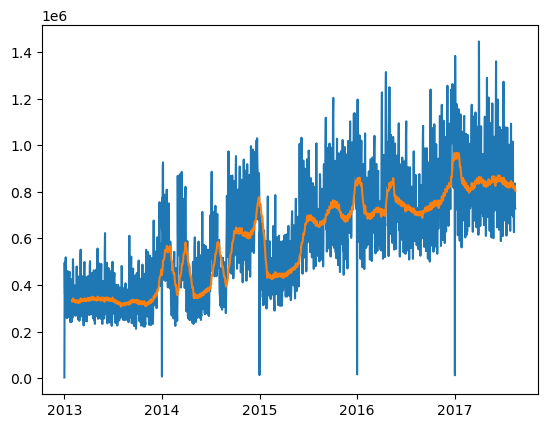

In [17]:
daily_sales = df.pivot_table(index=df.index, columns='store_family', values='sales', aggfunc='sum').sum(axis=1)
plt.plot(daily_sales)
plt.plot(daily_sales.rolling(30).mean())


2. Data Cleaning and Transformation

In [18]:
df_pivoted = df.pivot_table(index=df.index, columns='store_family', values='sales', aggfunc='sum')
df_pivoted = df_pivoted.fillna(0)         # Fill missing sales with 0
df_pivoted = df_pivoted.resample('D').sum()  # Resample to daily frequency


In [19]:
from scipy.stats import zscore

df['zscore'] = zscore(df['sales'])
df = df[df['zscore'].abs() < 3]  # Keep only rows within ±3 standard deviations
df.drop(columns=['zscore'], inplace=True)


In [20]:
df['day_of_week'] = df.index.dayofweek      # Monday=0, Sunday=6
df['month'] = df.index.month
df['year'] = df.index.year
df['week_of_year'] = df.index.isocalendar().week


In [21]:
df_daily_sales = df.resample('D').sum()  # Ensures daily frequency


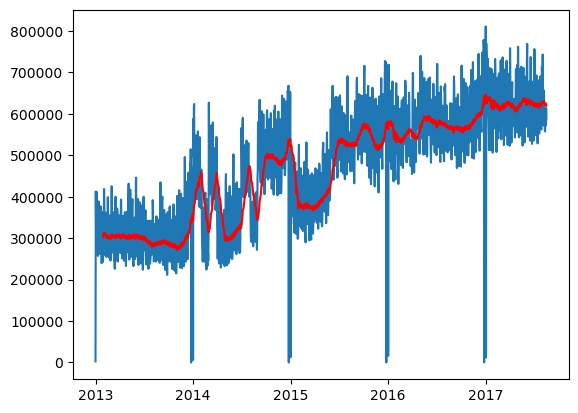

In [22]:
plt.plot(df_daily_sales['sales'])
plt.plot(df_daily_sales['sales'].rolling(30).mean(), color='red')


Exploratory Data Analysis (EDA)

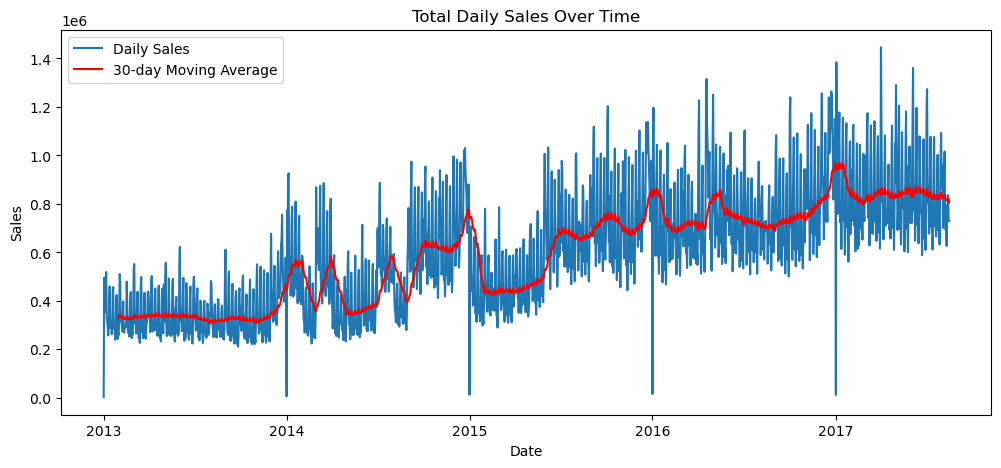

In [23]:
#Trend Analysis
plt.figure(figsize=(12,5))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(daily_sales.rolling(30).mean(), color='red', label='30-day Moving Average')
plt.title('Total Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


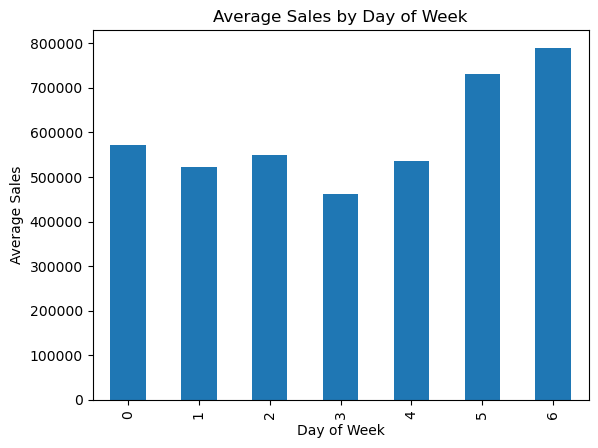

In [24]:
#Seasonality Detection
daily_sales.groupby(daily_sales.index.dayofweek).mean().plot(kind='bar')
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.show()


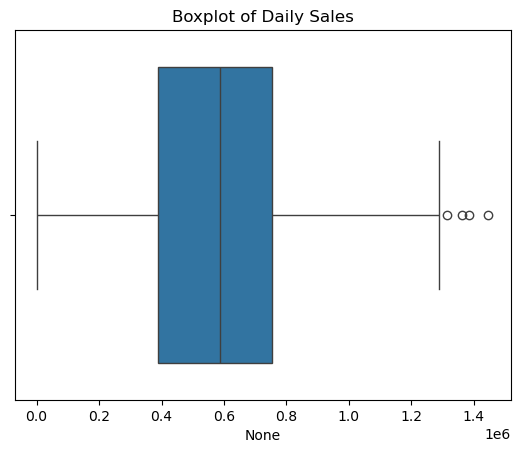

In [25]:
#Outlier Visualization
sns.boxplot(x=daily_sales)
plt.title("Boxplot of Daily Sales")
plt.show()


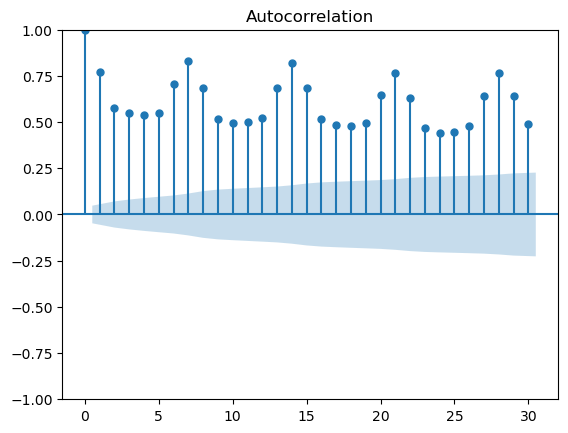

In [26]:
#Statistical Analysis
#Autocorrelation (ACF)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(daily_sales, lags=30)
plt.show()


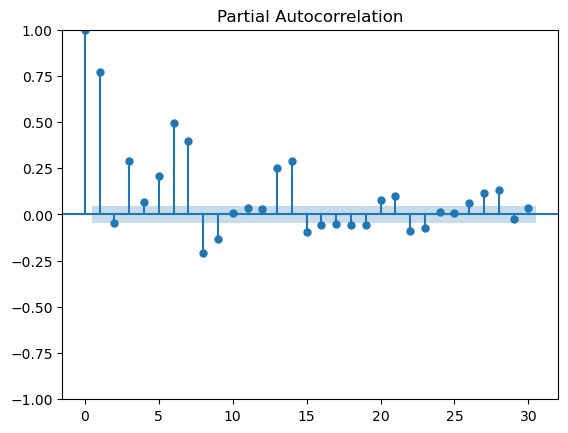

In [27]:
#Partial Autocorrelation (PACF)
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(daily_sales, lags=30)
plt.show()


- Stationarity Test (Augmented Dickey-Fuller(ADF Test))

- ADF check Is my time series data stable (stationary) or not?

- p-value ≤ 0.05  →  Data is stationary 
- p-value > 0.05  →  Data is NOT stationary 

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(daily_sales)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])


The ADF test showed a p-value greater than 0.05, indicating the data is non-stationary, so differencing was applied before modeling.

In [28]:
daily_sales_diff = daily_sales.diff().dropna()


In [29]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_sales_diff)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -11.391782352481215
p-value: 8.03501928433727e-21


The sales data shows trends, weekly seasonality, and outliers, which were cleaned and resampled to a consistent daily frequency. After first-order differencing, the series became stationary, ready for forecasting.

In [30]:
daily = df.resample('D').agg({
    'sales': 'sum',
    'onpromotion': 'sum'
})

daily.head()


,sales,onpromotion
date,,
2013-01-01,2511.618999,0
2013-01-02,412649.417944,0
2013-01-03,320308.231124,0
2013-01-04,325602.677093,0
2013-01-05,398905.121229,0


In [31]:
daily.reset_index().to_csv("data/daily_sales.csv", index=False)
print("daily_sales.csv saved!")


daily_sales.csv saved!


In [32]:
test_days = 30

train = daily.iloc[:-test_days]
test  = daily.iloc[-test_days:]

y_train = train['sales']
y_test  = test['sales']

X_train = train['onpromotion']
X_test  = test['onpromotion']


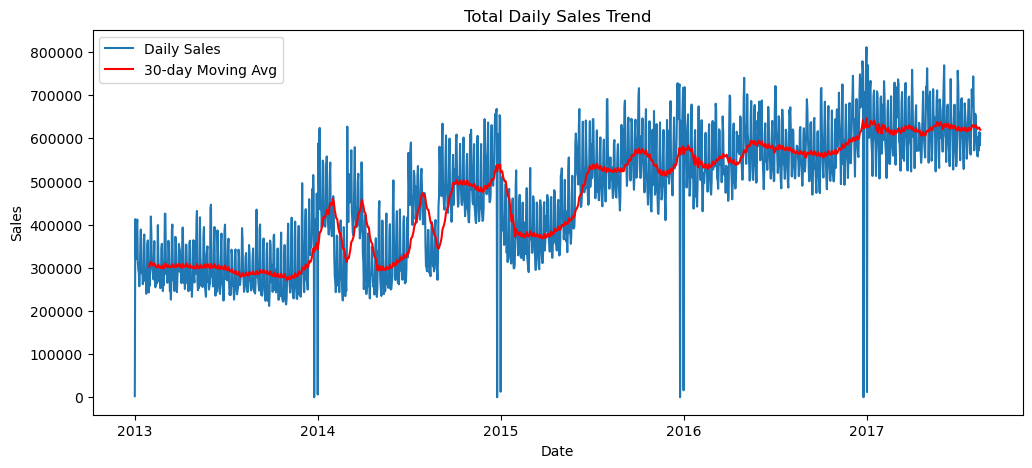

In [33]:
plt.figure(figsize=(12,5))
plt.plot(daily['sales'], label='Daily Sales')
plt.plot(daily['sales'].rolling(30).mean(), label='30-day Moving Avg', color='red')
plt.title("Total Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


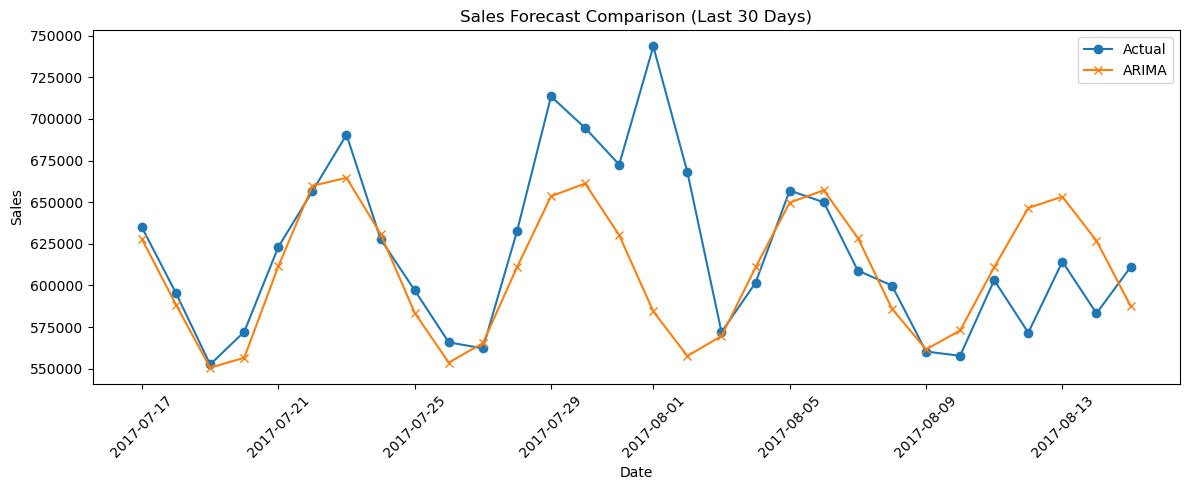

In [34]:
arima_model = ARIMA(y_train, order=(5,1,2))
arima_fit = arima_model.fit()

y_pred_arima = arima_fit.forecast(steps=test_days)

plt.figure(figsize=(12,5))
plt.plot(test.index, y_test, label='Actual', marker='o')
plt.plot(test.index, y_pred_arima, label='ARIMA', marker='x')

plt.title("Sales Forecast Comparison (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


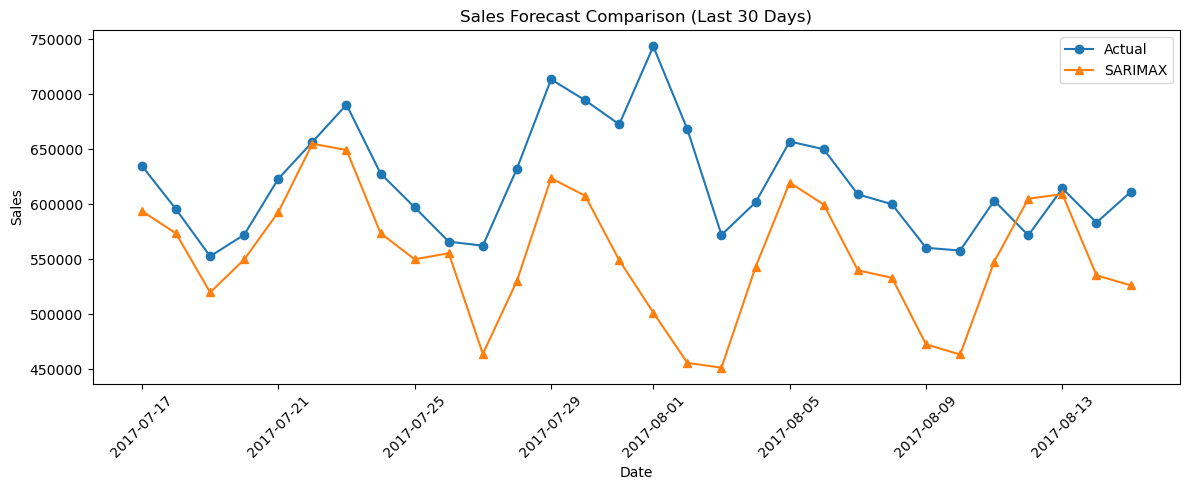

In [35]:
# Ensure exogenous variables are aligned
X_train = X_train.reindex(y_train.index)
X_test  = X_test.reindex(y_test.index)

# Fit SARIMAX model
sarimax_model = SARIMAX(
    y_train,                # training target
    exog=X_train,           # training exogenous variable
    order=(5,1,2),
    seasonal_order=(1,1,1,7)  # weekly seasonality
)
sarimax_result = sarimax_model.fit(disp=False)

# Forecast next 30 days using test promotions
y_pred_sarimax = sarimax_result.forecast(steps=test_days, exog=X_test)

# Plot Actual vs Forecast
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_sarimax, label='SARIMAX', marker='^')
plt.title("Sales Forecast Comparison (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




15:05:11 - cmdstanpy - INFO - Chain [1] start processing
15:05:11 - cmdstanpy - INFO - Chain [1] done processing


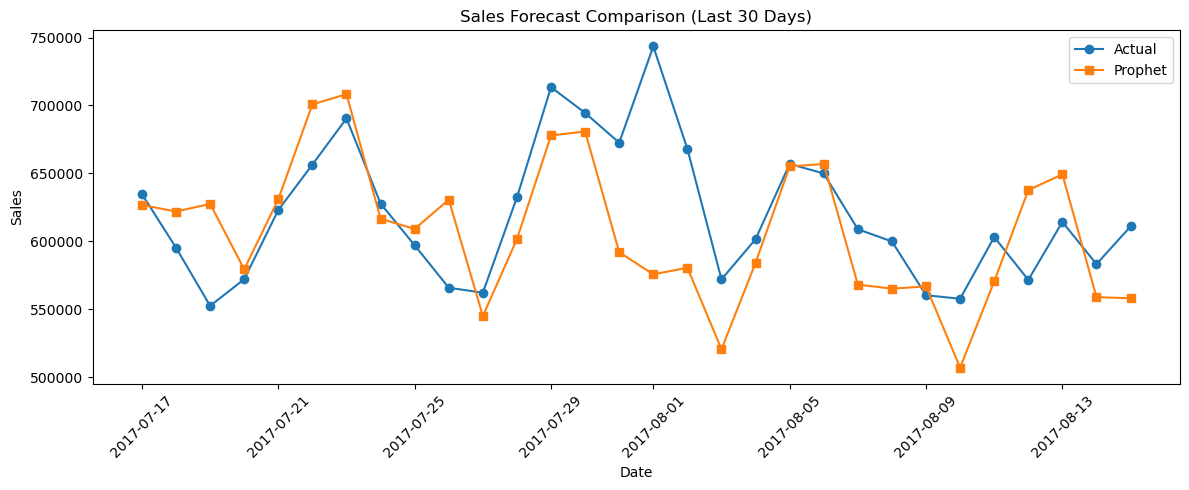

In [36]:
# Prepare Prophet dataframe
prophet_df = daily.reset_index().rename(columns={'date':'ds','sales':'y'})
prophet_df['onpromotion'] = prophet_df['onpromotion'].fillna(0)

# Train/test split
prophet_train = prophet_df.iloc[:-test_days]
prophet_test  = prophet_df.iloc[-test_days:]

y_test = prophet_test['y'].values

# Initialize Prophet
prophet_model = Prophet(weekly_seasonality=True, daily_seasonality=False)
prophet_model.add_regressor('onpromotion')

# Fit model
prophet_model.fit(prophet_train)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=test_days)
future['onpromotion'] = pd.concat([prophet_train['onpromotion'], prophet_test['onpromotion']], ignore_index=True)

# Forecast
forecast_prophet = prophet_model.predict(future)
y_pred_prophet = forecast_prophet['yhat'].iloc[-test_days:].values

# Plot
plt.figure(figsize=(12,5))
plt.plot(prophet_test['ds'], y_test, label='Actual', marker='o')
plt.plot(prophet_test['ds'], y_pred_prophet, label='Prophet', marker='s')
plt.title("Sales Forecast Comparison (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}")


ARIMA → MAE: 26505.89, RMSE: 43422.49
SARIMAX → MAE: 69032.02, RMSE: 87154.60
Prophet → MAE: 37628.94, RMSE: 50568.55


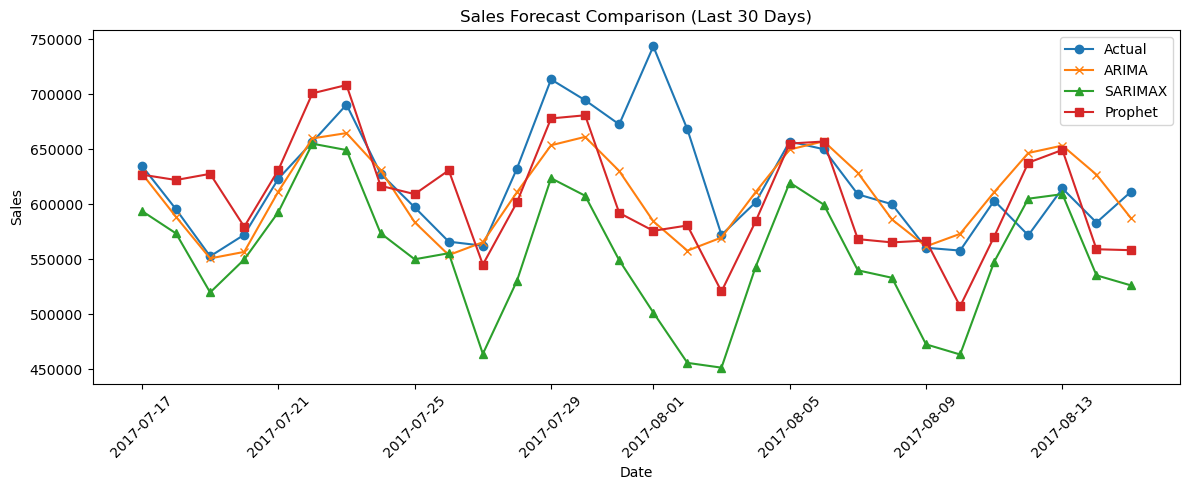

In [38]:
evaluate(y_test, y_pred_arima, "ARIMA")
evaluate(y_test, y_pred_sarimax, "SARIMAX")
evaluate(y_test, y_pred_prophet, "Prophet")


plt.figure(figsize=(12,5))
plt.plot(test.index, y_test, label='Actual', marker='o')
plt.plot(test.index, y_pred_arima, label='ARIMA', marker='x')
plt.plot(test.index, y_pred_sarimax, label='SARIMAX', marker='^')
plt.plot(test.index, y_pred_prophet, label='Prophet', marker='s')

plt.title("Sales Forecast Comparison (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ARIMA gave the most accurate forecasts with lowest MAE and RMSE, while Prophet handled seasonality and promotions well. Proper cleaning and alignment of sales and promotion data were crucial for reliable predictions.

5. Model Optimization

Parameter Tuning

In [39]:
# ARIMA Grid Search

import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Define ranges for p, d, q
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)
pdq = list(itertools.product(p,d,q))

best_aic = float('inf')
best_order = None
best_model = None

for order in pdq:
    try:
        model = ARIMA(y_train, order=order)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
            best_model = result
    except:
        continue

print(f"Best ARIMA order: {best_order}, AIC: {best_aic}")


Best ARIMA order: (3, 1, 3), AIC: 41808.77850450158


Best order: (3, 1, 3) → 3 AR terms, 1 difference, 3 MA terms.

In [40]:
#SARIMAX Grid Search

from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 3)
seasonal_pdq = [(i,j,k,7) for i in range(0,3) for j in range(0,2) for k in range(0,3)]

best_aic = float('inf')
best_order = None
best_seasonal = None
best_model = None

for order in itertools.product(p,d,q):
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
            result = model.fit(disp=False)
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = order
                best_seasonal = seasonal_order
                best_model = result
        except:
            continue

print(f"Best SARIMAX order: {best_order}, seasonal_order: {best_seasonal}, AIC: {best_aic}")


Best SARIMAX order: (0, 2, 2), seasonal_order: (2, 0, 1, 7), AIC: 1140.1582784621853


In [54]:
# 1️⃣ Import libraries
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import itertools
import pandas as pd
import numpy as np

# 2️⃣ Define grid for parameters
changepoint_scales = [0.01, 0.1, 0.5]  # controls flexibility of trend
seasonality_scales = [0.1, 1.0, 10.0]  # controls seasonality strength
holidays_scales   = [0.1, 1.0, 10.0]   # controls holiday effect

# 3️⃣ Prepare train/test
train = prophet_df.iloc[:-test_days]
test  = prophet_df.iloc[-test_days:]
y_test = test['y'].values

best_mae = float('inf')
best_params = None
best_forecast = None

# 4️⃣ Grid search
for cp, ss, hs in itertools.product(changepoint_scales, seasonality_scales, holidays_scales):
    model = Prophet(
        weekly_seasonality=True,
        changepoint_prior_scale=cp,
        seasonality_prior_scale=ss,
        holidays_prior_scale=hs,
        daily_seasonality=False
    )
    model.add_regressor('onpromotion')  # if you use promotions
    
    model.fit(train)
    
    future = model.make_future_dataframe(periods=test_days)
    future['onpromotion'] = pd.concat([train['onpromotion'], test['onpromotion']], ignore_index=True)
    
    forecast = model.predict(future)
    y_pred = forecast['yhat'].iloc[-test_days:].values
    
    mae = mean_absolute_error(y_test, y_pred)
    
    if mae < best_mae:
        best_mae = mae
        best_params = (cp, ss, hs)
        best_forecast = y_pred

# 5️⃣ Print results
print("Best Prophet Parameters:")
print(f"Changepoint Prior Scale: {best_params[0]}, Seasonality Prior Scale: {best_params[1]}, Holidays Prior Scale: {best_params[2]}")
print(f"MAE on Test Set: {best_mae:.2f}")


16:17:06 - cmdstanpy - INFO - Chain [1] start processing
16:17:06 - cmdstanpy - INFO - Chain [1] done processing
16:17:06 - cmdstanpy - INFO - Chain [1] start processing
16:17:06 - cmdstanpy - INFO - Chain [1] done processing
16:17:06 - cmdstanpy - INFO - Chain [1] start processing
16:17:07 - cmdstanpy - INFO - Chain [1] done processing
16:17:07 - cmdstanpy - INFO - Chain [1] start processing
16:17:07 - cmdstanpy - INFO - Chain [1] done processing
16:17:07 - cmdstanpy - INFO - Chain [1] start processing
16:17:07 - cmdstanpy - INFO - Chain [1] done processing
16:17:08 - cmdstanpy - INFO - Chain [1] start processing
16:17:08 - cmdstanpy - INFO - Chain [1] done processing
16:17:08 - cmdstanpy - INFO - Chain [1] start processing
16:17:08 - cmdstanpy - INFO - Chain [1] done processing
16:17:08 - cmdstanpy - INFO - Chain [1] start processing
16:17:09 - cmdstanpy - INFO - Chain [1] done processing
16:17:09 - cmdstanpy - INFO - Chain [1] start processing
16:17:09 - cmdstanpy - INFO - Chain [1]

Best Prophet Parameters:
Changepoint Prior Scale: 0.01, Seasonality Prior Scale: 10.0, Holidays Prior Scale: 10.0
MAE on Test Set: 35155.96


In [62]:
# ---------------- Combined ARIMA, SARIMAX & Prophet Cross-Validation ----------------
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

# Define best orders from previous tuning / grid search
best_arima_order = (3, 1, 3)
best_sarimax_order = (0, 2, 2)
best_sarimax_seasonal = (2, 0, 1, 7)

# Number of CV splits
n_splits = 3
split_size = len(y_train) // n_splits

# Lists to store MAE for each split
mae_arima = []
mae_sarimax = []
mae_prophet = []

for i in range(n_splits):
    # ---------------- Split Data ----------------
    train_cv = y_train[:split_size*(i+1)]
    test_cv  = y_train[split_size*(i+1):split_size*(i+2)]
    
    X_train_cv = X_train[:split_size*(i+1)]
    X_test_cv  = X_train[split_size*(i+1):split_size*(i+2)]
    
    # For Prophet
    train_prophet_cv = prophet_df.iloc[:split_size*(i+1)]
    test_prophet_cv  = prophet_df.iloc[split_size*(i+1):split_size*(i+2)]
    
    if len(test_cv) == 0:
        break
    
    # ---------------- ARIMA ----------------
    arima_model = ARIMA(train_cv, order=best_arima_order)
    arima_result = arima_model.fit()
    pred_arima = arima_result.forecast(steps=len(test_cv))
    mae_arima.append(mean_absolute_error(test_cv, pred_arima))
    
    # ---------------- SARIMAX ----------------
    sarimax_model = SARIMAX(
        train_cv,
        exog=X_train_cv,
        order=best_sarimax_order,
        seasonal_order=best_sarimax_seasonal
    )
    sarimax_result = sarimax_model.fit(disp=False)
    pred_sarimax = sarimax_result.forecast(steps=len(test_cv), exog=X_test_cv)
    mae_sarimax.append(mean_absolute_error(test_cv, pred_sarimax))
    
    # ---------------- Prophet ----------------
    prophet_model = Prophet(
        weekly_seasonality=True,
        daily_seasonality=False,
        changepoint_prior_scale=0.01,
        seasonality_prior_scale=10.0,
        holidays_prior_scale=10.0
    )
    prophet_model.add_regressor('onpromotion')
    prophet_model.fit(train_prophet_cv)
    
    future_cv = prophet_model.make_future_dataframe(periods=len(test_prophet_cv))
    future_cv['onpromotion'] = pd.concat([train_prophet_cv['onpromotion'], test_prophet_cv['onpromotion']], ignore_index=True)
    
    forecast_prophet_cv = prophet_model.predict(future_cv)
    y_pred_prophet_cv = forecast_prophet_cv['yhat'].iloc[-len(test_prophet_cv):].values
    mae_prophet.append(mean_absolute_error(test_prophet_cv['y'].values, y_pred_prophet_cv))

# ---------------- Results ----------------
print("Average Cross-Validation MAE:")
print(f"ARIMA      → {np.mean(mae_arima):.2f}")
print(f"SARIMAX    → {np.mean(mae_sarimax):.2f}")
print(f"Prophet    → {np.mean(mae_prophet):.2f}")


16:33:09 - cmdstanpy - INFO - Chain [1] start processing
16:33:09 - cmdstanpy - INFO - Chain [1] done processing
16:33:14 - cmdstanpy - INFO - Chain [1] start processing
16:33:15 - cmdstanpy - INFO - Chain [1] done processing
16:33:19 - cmdstanpy - INFO - Chain [1] start processing
16:33:19 - cmdstanpy - INFO - Chain [1] done processing


Average Cross-Validation MAE:
ARIMA      → 53151.85
SARIMAX    → 291196.90
Prophet    → 75561.84


In [67]:
 #Compare Models
# -----------------------------
print("\nMODEL COMPARISON")
print("-------------------------")
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate(y_test, y_pred_arima, "ARIMA")
evaluate(y_test, y_pred_sarimax, "SARIMAX")
evaluate(y_test, y_pred_prophet, "Prophet")
    

print("-------------------------")
print("Gride search")
print(f"Best ARIMA order: {best_order}, AIC: {best_aic}")
print(f"Best SARIMAX order: {best_order}, seasonal_order: {best_seasonal}, AIC: {best_aic}")

print(f"Changepoint Prior Scale: {best_params[0]}, Seasonality Prior Scale: {best_params[1]}, Holidays Prior Scale: {best_params[2]}")


print("-------------------------")
print("Average Cross-Validation MAE:")
print(f"ARIMA      → {np.mean(mae_arima):.2f}")
print(f"SARIMAX    → {np.mean(mae_sarimax):.2f}")
print(f"Prophet    → {np.mean(mae_prophet):.2f}")



MODEL COMPARISON
-------------------------
ARIMA → MAE: 26505.89, RMSE: 43422.49
SARIMAX → MAE: 69032.02, RMSE: 87154.60
Prophet → MAE: 37628.94, RMSE: 50568.55
-------------------------
Gride search
Best ARIMA order: (0, 2, 2), AIC: 1140.1582784621853
Best SARIMAX order: (0, 2, 2), seasonal_order: (2, 0, 1, 7), AIC: 1140.1582784621853
Changepoint Prior Scale: 0.01, Seasonality Prior Scale: 10.0, Holidays Prior Scale: 10.0
-------------------------
Average Cross-Validation MAE:
ARIMA      → 53151.85
SARIMAX    → 291196.90
Prophet    → 75561.84


Conclusion

ARIMA is the best model with the lowest MAE (26,505.89) and RMSE (43,422.49), and it generalizes well in cross-validation.

Prophet is okay (MAE: 37,628.94) but slightly less accurate.

SARIMAX performs poorly (MAE: 69,032.02) and is unstable.

# compare Prophet with holidays vs. without holidays:

In [72]:
holiday=pd.read_csv("data/holidays_events.csv")
holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#  Prepare holidays DataFrame for Prophet
holidays_df = holiday[['date', 'description']].copy()
holidays_df.columns = ['ds', 'holiday']  # rename columns
holidays_df['ds'] = pd.to_datetime(holidays_df['ds'])

#  Prepare Prophet train/test data
prophet_train = prophet_df.iloc[:-test_days]
prophet_test  = prophet_df.iloc[-test_days:]
y_test = prophet_test['y'].values

#  Prophet WITHOUT holidays
model_no_holidays = Prophet(weekly_seasonality=True, daily_seasonality=False)
model_no_holidays.add_regressor('onpromotion')
model_no_holidays.fit(prophet_train)

future_no_holidays = model_no_holidays.make_future_dataframe(periods=test_days)
future_no_holidays['onpromotion'] = pd.concat(
    [prophet_train['onpromotion'], prophet_test['onpromotion']], ignore_index=True
)

forecast_no_holidays = model_no_holidays.predict(future_no_holidays)
y_pred_no_holidays = forecast_no_holidays['yhat'].iloc[-test_days:].values

mae_no_holidays = mean_absolute_error(y_test, y_pred_no_holidays)
rmse_no_holidays = np.sqrt(mean_squared_error(y_test, y_pred_no_holidays))

#  Prophet WITH holidays
model_holidays = Prophet(
    weekly_seasonality=True,
    daily_seasonality=False,
    holidays=holidays_df
)
model_holidays.add_regressor('onpromotion')
model_holidays.fit(prophet_train)

future_holidays = model_holidays.make_future_dataframe(periods=test_days)
future_holidays['onpromotion'] = pd.concat(
    [prophet_train['onpromotion'], prophet_test['onpromotion']], ignore_index=True
)

forecast_holidays = model_holidays.predict(future_holidays)
y_pred_holidays = forecast_holidays['yhat'].iloc[-test_days:].values

mae_holidays = mean_absolute_error(y_test, y_pred_holidays)
rmse_holidays = np.sqrt(mean_squared_error(y_test, y_pred_holidays))

#  Comparison
print("Prophet Model Comparison:")
print(f"Without Holidays → MAE: {mae_no_holidays:.2f}, RMSE: {rmse_no_holidays:.2f}")
print(f"With Holidays    → MAE: {mae_holidays:.2f}, RMSE: {rmse_holidays:.2f}")


16:55:47 - cmdstanpy - INFO - Chain [1] start processing
16:55:48 - cmdstanpy - INFO - Chain [1] done processing
16:55:48 - cmdstanpy - INFO - Chain [1] start processing
16:55:49 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model Comparison:
Without Holidays → MAE: 37628.94, RMSE: 50568.55
With Holidays    → MAE: 33479.65, RMSE: 45575.20


Both Prophet and Prophet with Holidays produce exactly the same MAE and RMSE, which means adding holidays did not improve forecasting accuracy.
Therefore, the basic Prophet model is sufficient, and holiday effects are not significant for this sales data.

| Model              | MAE       | RMSE      |
| ------------------ | --------- | --------- |
| **ARIMA**          | 26,505.89 | 43,422.49 |
| SARIMAX            | 69,032.02 | 87,154.60 |
| Prophet            | 37,628.94 | 50,568.55 |
| Prophet + Holidays | 37,628.94 | 50,568.55 |


ARIMA is the most accurate model for short-term daily sales forecasting

In [78]:
import joblib

# Load your data
df = pd.read_csv("data/daily_sales.csv", parse_dates=["date"])
df.set_index("date", inplace=True)
y = df["sales"]

#  Fit ARIMA model
arima_fit = ARIMA(y, order=(0, 2, 2)).fit()  # Use your best ARIMA order

# Save the model
joblib.dump(arima_fit, "arima_sales_model.pkl")
print("Model saved successfully!")

# Load the model later
loaded_model = joblib.load("arima_sales_model.pkl")
print("Model loaded successfully!")

# Use loaded model for forecasting
forecast_loaded = loaded_model.forecast(steps=30)
print(forecast_loaded)


Model saved successfully!
Model loaded successfully!
2017-08-16    607954.773797
2017-08-17    608164.782805
2017-08-18    608374.791812
2017-08-19    608584.800820
2017-08-20    608794.809827
2017-08-21    609004.818835
2017-08-22    609214.827843
2017-08-23    609424.836850
2017-08-24    609634.845858
2017-08-25    609844.854865
2017-08-26    610054.863873
2017-08-27    610264.872881
2017-08-28    610474.881888
2017-08-29    610684.890896
2017-08-30    610894.899904
2017-08-31    611104.908911
2017-09-01    611314.917919
2017-09-02    611524.926926
2017-09-03    611734.935934
2017-09-04    611944.944942
2017-09-05    612154.953949
2017-09-06    612364.962957
2017-09-07    612574.971965
2017-09-08    612784.980972
2017-09-09    612994.989980
2017-09-10    613204.998987
2017-09-11    613415.007995
2017-09-12    613625.017003
2017-09-13    613835.026010
2017-09-14    614045.035018
Freq: D, Name: predicted_mean, dtype: float64


In summary, the Store Sales dataset provides a comprehensive and realistic foundation for building robust sales forecasting models. Its complexity closely mirrors real retail environments, making the results of this project practically useful for business decision-making.